<a href="https://colab.research.google.com/github/ibonetc/Inteligencia_Artificial/blob/master/MelSpectogramMusic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [0]:
def computepitches(file):
  wave_data, samplerate= librosa.load(file, mono=True, sr=44100)
  yt, index = librosa.effects.trim(wave_data)
  print('Duración Inicial: ',librosa.get_duration(wave_data),' Duración final: ', librosa.get_duration(yt))
  m=[max(p) for p in pitches]
  newm=[]
  for n in m:
    if n!=0:
      newm.append(n)
  print ('Pitches:',min(newm),'--', max(newm))
  return (pitches,magnitudes)

In [0]:
def plotpitches(pitches,magnitudes,xplot, yplot, index):
  plt.subplot(xplot, yplot, index)
  plt.plot(wave_data) 
  plt.title('wave')
  pitches, magnitudes = librosa.piptrack(y=wave_data, sr=samplerate)
  plt.subplot(xplot, yplot, index)
  plt.imshow(pitches[:100, :], aspect="auto", interpolation="nearest", origin="bottom")
  plt.title('pitches')

In [0]:
#pitches, magnitudes= plotpitches('Baritono_David_Tamayo_Muestra_2_Sin_Ruido.wav')

In [0]:
#pitches, magnitudes= plotpitches('/content/Contralto_Camila_Garcia_Muestra_2_Sin_Ruido.wav')

In [0]:
#pitches, magnitudes= plotpitches('/content/Soprano_Ingrid_Olarte_Muestra_2_Sin_Ruido.wav')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def compute_melgram(audio_path):
    ''' Compute a mel-spectrogram and returns it in a shape of (1,1,96,1366), where
    96 == #mel-bins and 1366 == #time frame
    parameters
    ----------
    audio_path: path for the audio file.
                Any format supported by audioread will work.
    More info: http://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load
    '''

    # mel-spectrogram parameters
    #SR = 44100#12000
    #N_FFT = 512
    #N_MELS = 96
    #HOP_LEN = 256
    #DURA = 29.12  # to make it 1366 frame..
    SR = 44100 #12000
    N_FFT = 256
    N_MELS = 52
    HOP_LEN = 128
    DURA = 32  # to make it 11026 frame.
    
    src, sr = librosa.load(audio_path, mono=True, sr=SR)  # whole signal
    n_sample = src.shape[0]
    n_sample_fit = int(DURA*SR)

    if n_sample < n_sample_fit:  # if too short
        src = np.hstack((src, np.zeros((int(DURA*SR) - n_sample,))))
    elif n_sample > n_sample_fit:  # if too long
        src = src[round((n_sample-n_sample_fit)/2):round((n_sample+n_sample_fit)/2)]
    melgram = librosa.feature.melspectrogram(y=src, sr=SR, hop_length=HOP_LEN,
                        n_fft=N_FFT, n_mels=N_MELS,power=2)**2
    ret = librosa.amplitude_to_db(melgram,ref=np.max)
    #ret = ret[np.newaxis, np.newaxis, :]
    return ret

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


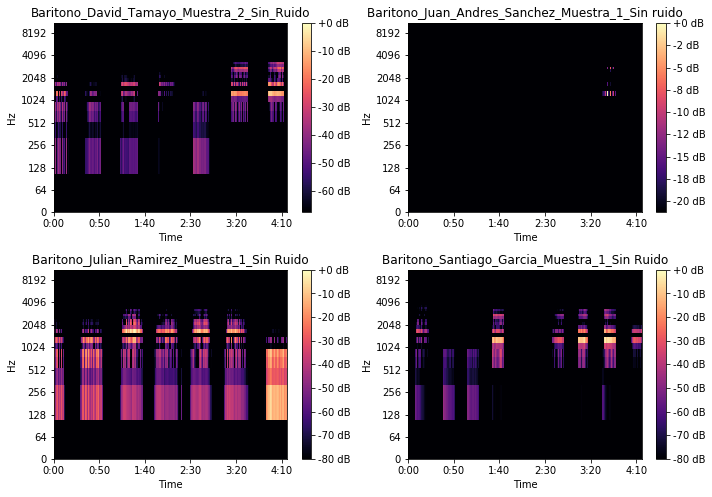

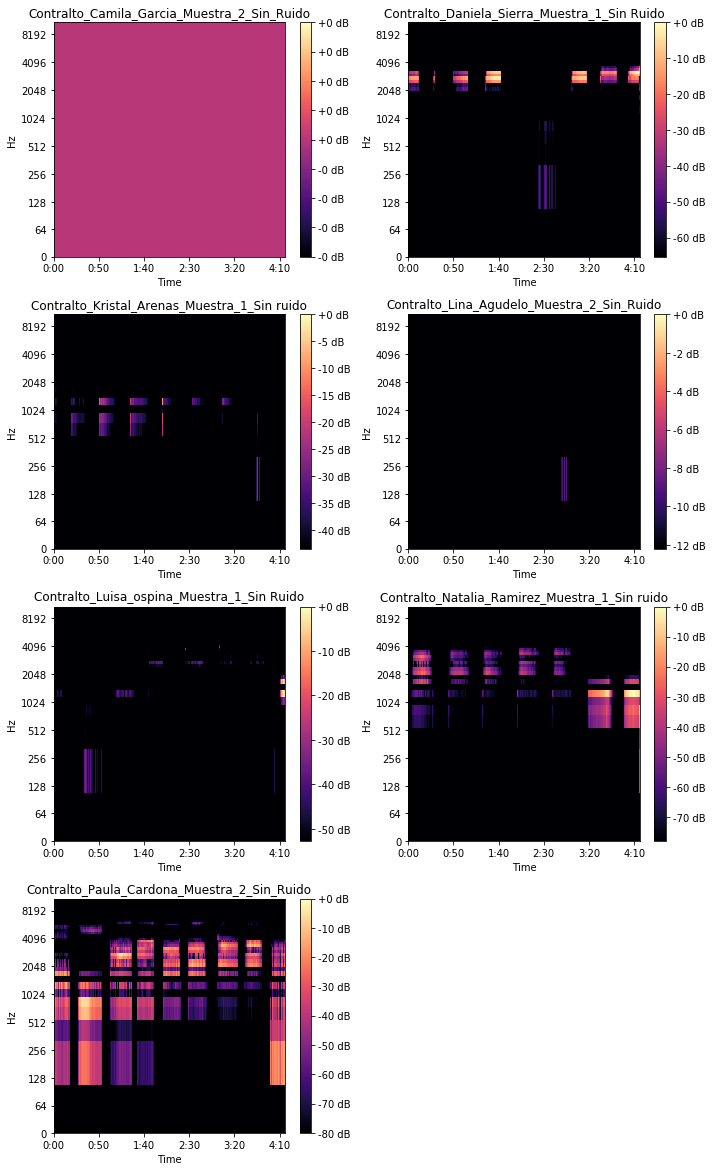

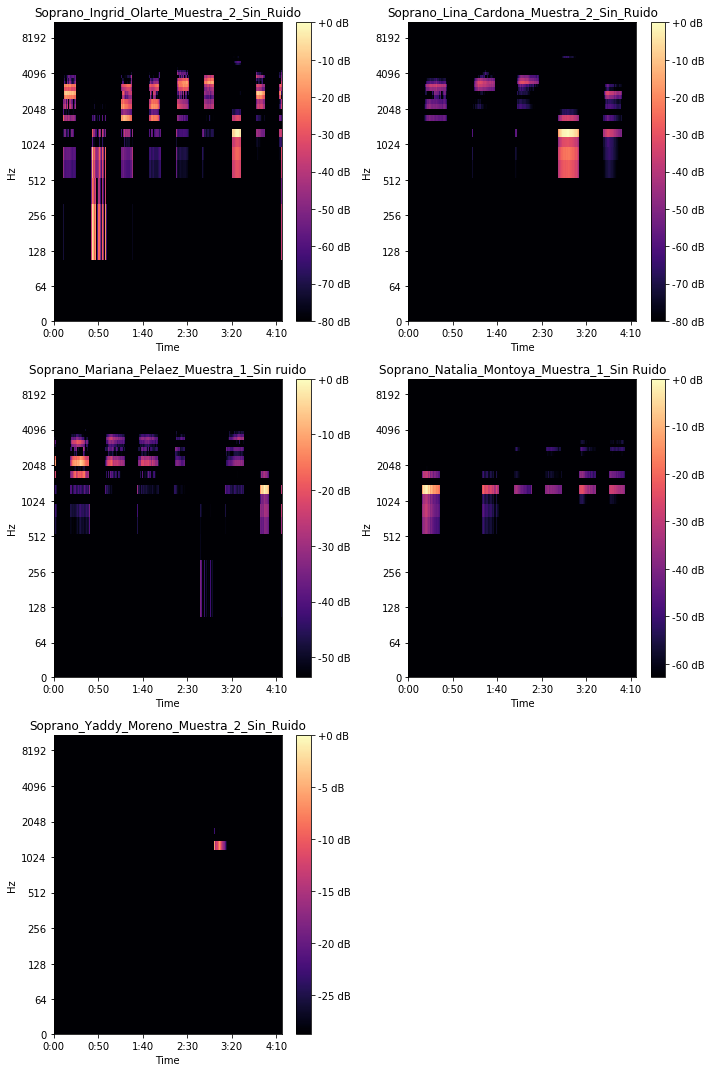

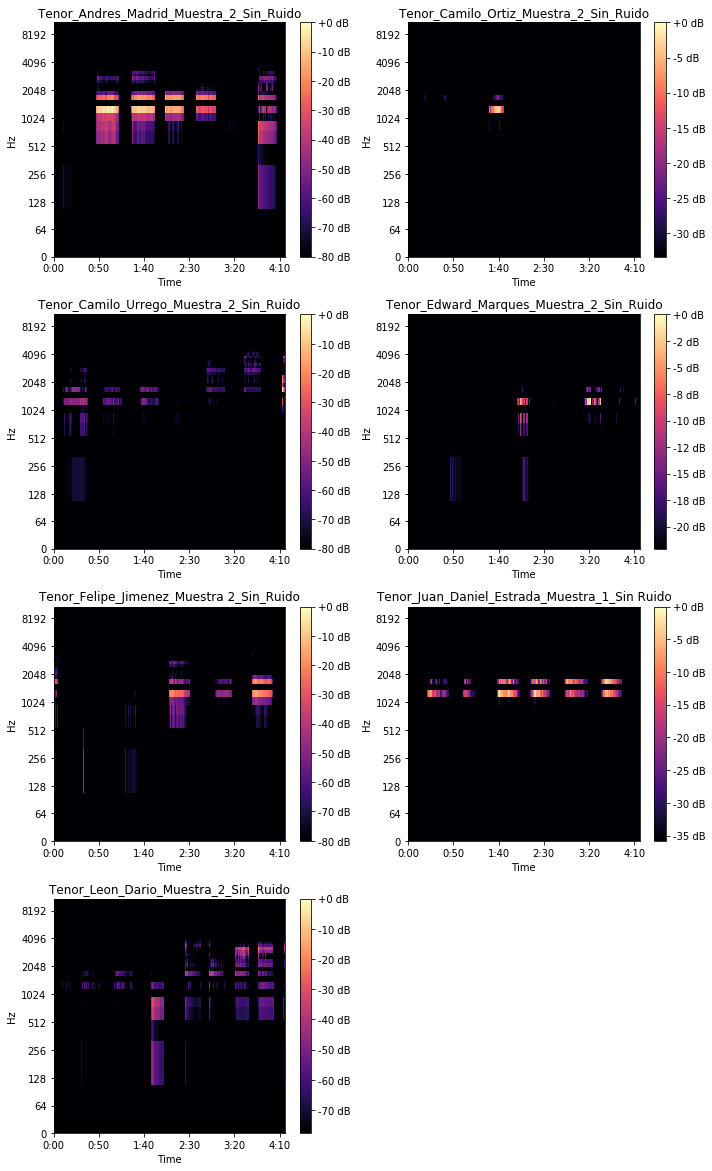

In [69]:
classes='baritono contralto soprano tenor'
labels=classes.split()
path='/content/drive/My Drive/Ejemplo/Escalas_Completas'
# prepare data like this
#melgrams = np.zeros((0, 1, 96, 1366))
melgrams = np.zeros((0, 1, N_MELS, 11026))
y_data=[]
for g in labels:
  i=1
  cant=len(os.listdir(f'{path}/{g}'))
  axes_y=5*math.ceil(cant/2)
  plt.figure(figsize=(10,axes_y))
  row=round(cant/2)+1
  for filename in os.listdir(f'{path}/{g}'):
    songname = f'{path}/{g}/{filename}'
    melgram=compute_melgram(songname)
    ##Imprimir el melgram
    plt.subplot(row, 2, i)
    i=i+1
    title=filename.split('.')[0]
    plt.title(f'{title}')
    librosa.display.specshow(melgram,y_axis='log', x_axis='time', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    ret = melgram[np.newaxis, np.newaxis, :]
    melgrams = np.concatenate((melgrams, ret), axis=0)
    y_data.append(g)
    plt.tight_layout()

In [25]:
a='h_r y_c.wav'
a.split('.')[0]

'h_r y_c'

In [94]:
classes='baritono contralto soprano tenor'
labels=classes.split()
path='/content/drive/My Drive/Ejemplo/Escalas_Completas'

y_data=[]
songname ='/content/drive/My Drive/Ejemplo/Escalas_Completas/contralto/Contralto_Camila_Garcia_Muestra_2_Sin_Ruido.wav'
# mel-spectrogram parameters
SR = 44100 #12000
N_FFT = 256
N_MELS = 52
HOP_LEN = 128
DURA = 32  # to make it 11026 frame.
melgrams = np.zeros((0, 1, N_MELS, 11026))
src, sr = librosa.load(songname, mono=True, sr=SR)  # whole signal
n_sample = src.shape[0]
n_sample_fit = int(DURA*SR)
if n_sample < n_sample_fit:  # if too short
    src = np.hstack((src, np.zeros((int(DURA*SR) - n_sample,))))
elif n_sample > n_sample_fit:  # if too long
    src = src[round((n_sample-n_sample_fit)/2):round((n_sample+n_sample_fit)/2)]
melgram = librosa.feature.melspectrogram(y=src, sr=SR, hop_length=HOP_LEN,
                    n_fft=N_FFT, n_mels=N_MELS,power=2)**2
melgram = librosa.power_to_db(melgram,ref=np.max)

ret = melgram[np.newaxis, np.newaxis, :]
#melgram=ret
melgrams = np.concatenate((melgrams, ret), axis=0)
#y_data.append(g)



/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [65]:
melgrams.shape

(1, 1, 52, 11026)

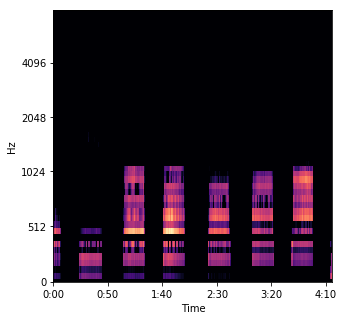

In [95]:
plt.figure(figsize=(5,5))
librosa.display.specshow(melgram,y_axis='mel', fmax=8000,
                          x_axis='time')

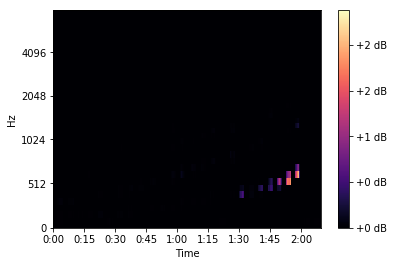

In [22]:
songname ='/content/drive/My Drive/Ejemplo/Escalas_Completas/contralto/Contralto_Camila_Garcia_Muestra_2_Sin_Ruido.wav'
# mel-spectrogram parameters
SR = 44100
N_FFT = 256
N_MELS = 52
HOP_LEN = 128
DURA = 32


src, sr = librosa.load(songname)  # whole signal
melgram = librosa.feature.melspectrogram(y=src,sr=sr, n_mels=40)
librosa.display.specshow(melgram,sr=sr,y_axis='mel', fmax=8000,
                          x_axis='time')
melgram = librosa.power_to_db(melgram**2,ref=np.max)
plt.colorbar(format='%+2.0f dB')

In [102]:
librosa.get_duration(src)/60

4.325814058956916

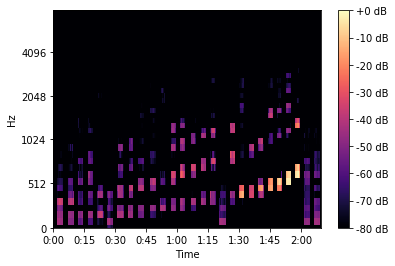

In [23]:
librosa.display.specshow(melgram,sr=sr, y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [91]:
from scipy.io.wavfile import read as wavread
[samplerate, x] = wavread(songname)
samplerate

44100